In [19]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
Sequential = tf.keras.models.Sequential
from keras import layers,models
to_categorical = tf.keras.utils.to_categorical

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
7


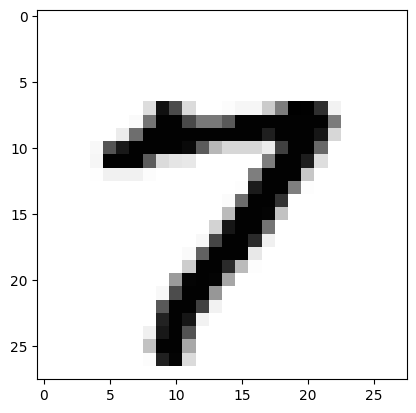

In [20]:
# data preparation and importing the data
(x_train, y_train), (x_test, y_test) = mnist.load_data() #We have partitioned the data into training and testing sets

# Exploring the data
print(x_train.shape) # 60000 images with 28x28 pixels
print(x_test.shape) # 10000 images with 28x28 pixels
print(y_train.shape) # 60000 labels
print(y_test.shape) # 10000 labels

index_image = 5555
print(y_train[index_image])
plt.imshow(x_train[index_image], cmap='Greys')
plt.show()

In [21]:
# Data preprocessing
# 4d form as input (size of data, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Converting data in form of float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data in range 0 to 1

x_train /= 255
x_test /= 255

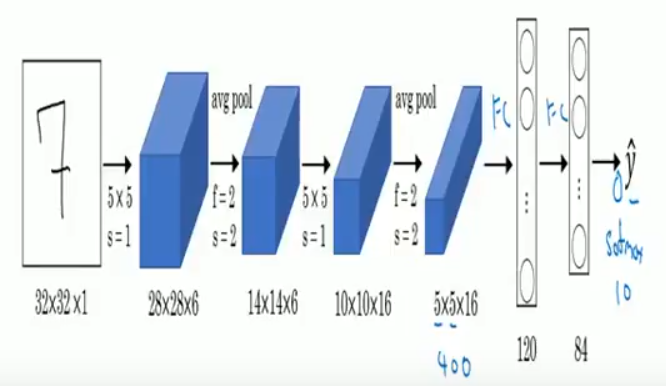

In [22]:
#  Creating the model

# instantiate model
model = Sequential()

# add a convolutional layer
model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1), padding='same'))

# add a average pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))

# add a convolutional layer
model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

# add a average pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# add fully connected layers
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='same'))

# add flatten layer
model.add(layers.Flatten())

# add dense layer
model.add(layers.Dense(84, activation='tanh'))

# add output layer
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 27, 27, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 23, 23, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_9             │ (None, 11, 11, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 84)             │     1,219,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,271,306 (4.85 MB)

 Trainable params: 1,271,306 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# one hot encoding to the labels (0 to 9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# training the model
hist = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test)) # verbose = 1 to see the progress